<p style="text-align: center; font-size: 28px;"><b>Evaluation Metrics</b></p>

When we build a machine learning model to classify data, it’s not enough to just make predictions — we need to understand **how well the model performs**.  
Different evaluation metrics give us different perspectives on the model’s strengths and weaknesses. By using a combination of these measures, we can make informed decisions about whether the model is suitable for our problem or needs further improvement.

# Confusion Matrix

When building a machine learning model that makes predictions, an essential step is evaluating its performance. To do this, we often use a **confusion matrix**, which summarizes how well the model’s predictions match the actual outcomes.

Suppose we are creating a classifier to detect spam emails. After passing the evaluation set through the model, we compare predicted labels with the true labels. Each prediction falls into one of four categories:

- **True Positive (TP):** Predicted spam, and it was actually spam  
- **True Negative (TN):** Predicted not spam, and it was actually not spam  
- **False Positive (FP):** Predicted spam, but it was not spam  
- **False Negative (FN):** Predicted not spam, but it was spam  

These outcomes can be visualized in a confusion matrix, where rows represent the actual labels and columns represent the predicted labels:

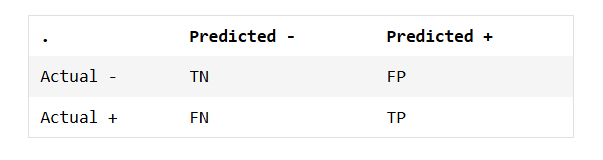

In practice, we calculate these values from the evaluation data to construct the confusion matrix, which then serves as the foundation for many other performance metrics in classification tasks.
```


In [1]:
# Import the confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix

# ----------------------------------------------------------
# Checkpoint 1:
# We are given two ordered lists:
#   - actual: the true labels of the dataset (1 = spam, 0 = not spam)
#   - predicted: the classifications returned by the model
# We need to create four variables to store the results,
# initialized to zero.
# ----------------------------------------------------------
actual = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
predicted = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0

# ----------------------------------------------------------
# Checkpoint 2 & 3:
# Loop through each prediction and compare with the actual label.
# - True Positive (TP): actual[i] == 1 and predicted[i] == 1
# - True Negative (TN): actual[i] == 0 and predicted[i] == 0
# - False Positive (FP): actual[i] == 0 and predicted[i] == 1
# - False Negative (FN): actual[i] == 1 and predicted[i] == 0
# ----------------------------------------------------------
for i in range(len(actual)):
    if actual[i] == 1 and actual[i] == predicted[i]:
        true_positives += 1
    elif actual[i] == 0 and predicted[i] == 0:
        true_negatives += 1
    elif predicted[i] == 1 and actual[i] == 0:
        false_positives += 1
    elif actual[i] == 1 and predicted[i] == 0:
        false_negatives += 1

# ----------------------------------------------------------
# Checkpoint 4:
# Print the counts of true positives, true negatives,
# false positives, and false negatives.
# ----------------------------------------------------------
print("True Positives:", true_positives)
print("True Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)

# ----------------------------------------------------------
# Checkpoint 5 & 6:
# Use scikit-learn's confusion_matrix function to compute
# the matrix directly, and print the result.
# ----------------------------------------------------------
conf_matrix = confusion_matrix(actual, predicted)
print("\nConfusion Matrix:\n", conf_matrix)


True Positives: 3
True Negatives: 0
False Positives: 3
False Negatives: 4

Confusion Matrix:
 [[0 3]
 [4 3]]


# Accuracy

One way to evaluate the performance of a classification model is by calculating its **accuracy**. Accuracy measures the proportion of correct predictions out of the total predictions made by the model. It is computed using the counts from the confusion matrix:

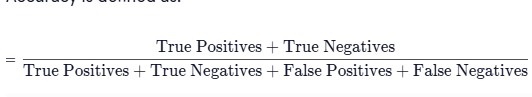

In other words, accuracy represents how often the classifier makes the right prediction, whether identifying positive cases correctly or recognizing negatives correctly.  
Next, we can calculate the accuracy of our classification algorithm using this formula.


In [2]:
# ----------------------------------------------------------
# Checkpoint 1:
# Calculate the accuracy of the classification algorithm.
# Accuracy is defined as:
#   (True Positives + True Negatives) /
#   (True Positives + True Negatives + False Positives + False Negatives)
# Store the result in a variable named `accuracy` and print it.
# ----------------------------------------------------------

accuracy = (true_positives + true_negatives) / (
    true_positives + true_negatives + false_positives + false_negatives
)

print("Accuracy:", accuracy)


Accuracy: 0.3


# Recall

While accuracy is a common metric, it can sometimes give a misleading picture of model performance. For example, imagine building a spam classifier for email accounts that almost never receive spam. A model that always predicts "not spam" would achieve high accuracy but fail to detect the few spam messages that do exist — missing the actual goal of the classifier.

In such cases, **recall** is a more meaningful measure. Recall quantifies the ability of a model to correctly identify positive cases. It is defined as:

\[
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
\]

In other words, recall represents the proportion of actual positive cases that the model successfully classified as positive.  
For our spam detection example, recall would be the fraction of spam emails correctly identified out of all spam emails in the dataset. A model that never predicts spam would have a recall of **0**, regardless of its overall accuracy.


In [3]:
# ----------------------------------------------------------
# Checkpoint 1:
# Calculate the recall of the classification algorithm.
# Recall is defined as:
#   True Positives /
#   (True Positives + False Negatives)
# Store the result in a variable named `recall` and print it.
# ----------------------------------------------------------

recall = true_positives / (true_positives + false_negatives)

print("Recall:", recall)


Recall: 0.42857142857142855


# Precision

Just like recall, precision highlights another important aspect of model evaluation. Consider a classifier that always predicts "spam." Such a model would have a recall of 1, since it never misses a spam email, but its accuracy would be low and its usefulness limited because it also misclassifies most non-spam emails as spam.

**Precision** measures how reliable the model’s positive predictions are. It is defined as:

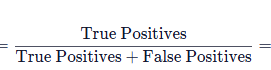

In other words, precision is the proportion of correct positive predictions out of all predictions the model labeled as positive.  
For the spam classifier, precision tells us how many of the emails predicted as spam were actually spam. A model that always predicts spam would have high recall but very low precision, since most of its positive predictions would be wrong.


In [4]:
# ----------------------------------------------------------
# Checkpoint 1:
# Calculate the precision of the classification algorithm.
# Precision is defined as:
#   True Positives /
#   (True Positives + False Positives)
# Store the result in a variable named `precision` and print it.
# ----------------------------------------------------------

precision = true_positives / (true_positives + false_positives)

print("Precision:", precision)


Precision: 0.5


# F1-Score

To evaluate a model more comprehensively, we often need to balance both **precision** and **recall**. The **F1-score** combines these two metrics into a single measure using the **harmonic mean**, which penalizes extreme differences between precision and recall.

The F1-score is defined as:

$$
F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$

We use the harmonic mean rather than the arithmetic mean because it ensures that the F1-score will be low if either precision or recall is close to 0.

**Example:**

- Precision = 0.02, Recall = 1  

Arithmetic mean:

$$
\frac{1 + 0.02}{2} = 0.51
$$

Harmonic mean (F1-score):

$$
\frac{2 \times 1 \times 0.02}{1 + 0.02} = 0.039
$$


In [5]:
# ----------------------------------------------------------
# Checkpoint 1:
# Calculate the F1-score of the classification algorithm.
# The F1-score is the harmonic mean of precision and recall:
# 
#   F1 = (2 * Precision * Recall) / (Precision + Recall)
#
# Store the result in a variable named `f_1` and print it.
# ----------------------------------------------------------

f_1 = (2 * precision * recall) / (precision + recall)

print("F1-score:", f_1)


F1-score: 0.4615384615384615


# Review

There is no single metric that works best in all situations. Choosing between **accuracy**, **precision**, **recall**, **F1-score**, or other evaluation metrics depends on the specific classification task and its priorities.

For instance, in the spam email example, we would likely prefer a model with high **precision** even if its recall is lower. This is because it is more important to avoid mistakenly classifying an important email as spam than it is to let a few spam messages slip into the inbox.

The key is to understand the problem you are trying to solve — that will guide which metric is most meaningful.

Libraries like **scikit-learn** provide built-in functions to calculate these metrics, making evaluation more efficient.

**Key Takeaways:**

- Each classification result falls into one of four categories:  
  - True Positive (actual = 1, predicted = 1)  
  - True Negative (actual = 0, predicted = 0)  
  - False Positive (actual = 0, predicted = 1)  
  - False Negative (actual = 1, predicted = 0)  
  These outcomes are often summarized in a **confusion matrix**.  

- **Accuracy**: Proportion of all predictions that were correct.  

- **Recall**: Fraction of actual positives correctly identified.  

- **Precision**: Fraction of predicted positives that were truly positive.  

- **F1-score**: Harmonic mean of precision and recall.  
  - This score will be low if either precision or recall is low, reflecting poor balance.  


In [7]:
# ----------------------------------------------------------
# Checkpoint 1:
# Use scikit-learn's built-in functions to calculate evaluation metrics.
# All functions take two parameters:
#   - actual: the list of true labels
#   - predicted: the list of predicted classifications
#
# Call accuracy_score() first and print the result.
# ----------------------------------------------------------

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy:", accuracy_score(actual, predicted))

# ----------------------------------------------------------
# Checkpoint 2:
# Call recall_score(), precision_score(), and f1_score()
# with the same parameters (actual, predicted).
# Print their results as well.
# ----------------------------------------------------------

print("Recall:", recall_score(actual, predicted))
print("Precision:", precision_score(actual, predicted))
print("F1-score:", f1_score(actual, predicted))


Accuracy: 0.3
Recall: 0.42857142857142855
Precision: 0.5
F1-score: 0.46153846153846156


### Summary of Key Metrics

To evaluate classification results, we use four main statistics derived from the confusion matrix:

- **Accuracy** → *How often the model is right overall*  
  $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$  

- **Recall** → *How many actual positives the model correctly found*  
  $$Recall = \frac{TP}{TP + FN}$$  

- **Precision** → *Of the predicted positives, how many were actually positive*  
  $$Precision = \frac{TP}{TP + FP}$$  

- **F1-score** → *Balances precision and recall into one number*  
  $$F1 = \frac{2 \times Precision \times Recall}{Precision + Recall}$$  

---

### Easy Way to Remember 🧠

- **Accuracy** → “Out of everything, how much did I get right?”  
- **Recall** → “Of all the real positives, how many did I catch?” *(think: catching spam emails)*  
- **Precision** → “Of all the ones I called positive, how many were truly positive?” *(think: avoiding false alarms)*  
- **F1-score** → “How well am I balancing precision and recall together?”  

By keeping these short questions in mind, you’ll be able to quickly recall what each metric means and when to use it.